# Task 4: Exploratory Data Analysis- Terrorism

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

In [1]:
# Importing Required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importing dataset
data = pd.read_csv('globalterrorism.csv',encoding= 'ISO-8859-1', low_memory= False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Pre-processing Data

In [5]:
data.shape

(181691, 135)

In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Number of unique values in each column

In [11]:
for i in data.columns:
    print(i,len(data[i].unique()))

eventid 181691
iyear 47
imonth 13
iday 32
approxdate 2245
extended 2
resolution 1860
country 205
country_txt 205
region 12
region_txt 12
provstate 2856
city 36675
latitude 48323
longitude 48040
specificity 6
vicinity 3
location 44110
summary 112493
crit1 2
crit2 2
crit3 2
doubtterr 4
alternative 6
alternative_txt 6
multiple 3
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
attacktype2 10
attacktype2_txt 10
attacktype3 9
attacktype3_txt 9
targtype1 22
targtype1_txt 22
targsubtype1 113
targsubtype1_txt 113
corp1 33239
target1 86007
natlty1 216
natlty1_txt 216
targtype2 23
targtype2_txt 23
targsubtype2 108
targsubtype2_txt 108
corp2 2692
target2 5044
natlty2 159
natlty2_txt 159
targtype3 21
targtype3_txt 21
targsubtype3 93
targsubtype3_txt 93
corp3 423
target3 721
natlty3 111
natlty3_txt 111
gname 3537
gsubname 1184
gname2 434
gsubname2 61
gname3 117
gsubname3 15
motive 14491
guncertain1 3
guncertain2 3
guncertain3 3
individual 2
nperps 114
nperpcap 51
claimed 4
claimmode 11
claimmode

Check is there are some missing values

In [12]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [13]:
# Checking for duplicate values
data.duplicated().sum()

0

# Cleaning The Data

In [14]:
#Since there are 135 Columns. We will take only those columns which will help in our Analysis
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Duration','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality',
                        'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','latitude': 'lat',
                       'longitude':'long','weaptype1_txt':'Weapon_type','motive':'Motive','ishostkid':'Host'},inplace=True)
data.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'Duration',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [15]:
data = data[['Year','Month','Day','Duration','Country','Region','city','lat','long','success','suicide','AttackType','Target','Nationality','Group','Motive','Weapon_type','Killed','Wounded','Summary','Target_type','Host']]
data['Casualties']= data['Killed'] + data['Wounded']
data.head(5)

,Year,Month,Day,Duration,Country,Region,city,lat,long,success,...,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,...,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,Private Citizens & Property,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,...,Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,Government (Diplomatic),1.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,...,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,Journalists & Media,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,...,United States,Unknown,NaN,Explosives,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,...,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN


In [17]:
# Removing the unknowns values from the columnns
data=data[pd.notnull(data.lat)]
data=data[pd.notnull(data.long)]
print("Unknown values are removed from the columns")

Unknown values are removed from the columns


In [18]:
data.duplicated().sum()

8894

In [20]:
#Removing the Duplicated values
data.drop_duplicates()

,Year,Month,Day,Duration,Country,Region,city,lat,long,success,...,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,...,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,Private Citizens & Property,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,...,Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,Government (Diplomatic),1.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,...,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,Journalists & Media,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,...,United States,Unknown,NaN,Explosives,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,...,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,...,Somalia,Al-Shabaab,NaN,Firearms,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Military,0.0,3.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,1,...,Russia,Muslim extremists,NaN,Explosives,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Military,0.0,9.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,1,...,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,24.798346,93.940430,0,...,India,Unknown,NaN,Explosives,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),0.0,0.0


In [22]:
# Checking the Null Values in the dataset
data.isnull().sum()

Year                0
Month               0
Day                 0
Duration            0
Country             0
Region              0
city              426
lat                 0
long                0
success             0
suicide             0
AttackType          0
Target            598
Nationality      1516
Group               0
Motive         127101
Weapon_type         0
Killed           9779
Wounded         15668
Summary         62521
Target_type         0
Host              178
Casualties      16218
dtype: int64

In [24]:
#Filling whereever there is NA values with 0
data.fillna(0)

,Year,Month,Day,Duration,Country,Region,city,lat,long,success,...,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,...,Dominican Republic,MANO-D,0,Unknown,1.0,0.0,0,Private Citizens & Property,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,...,Belgium,23rd of September Communist League,0,Unknown,0.0,0.0,0,Government (Diplomatic),1.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,...,United States,Unknown,0,Unknown,1.0,0.0,0,Journalists & Media,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,...,United States,Unknown,0,Explosives,0.0,0.0,0,Government (Diplomatic),0.0,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,...,United States,Unknown,0,Incendiary,0.0,0.0,0,Government (Diplomatic),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,...,Somalia,Al-Shabaab,0,Firearms,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Military,0.0,3.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,1,...,Russia,Muslim extremists,0,Explosives,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Military,0.0,9.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,1,...,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0,Incendiary,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,24.798346,93.940430,0,...,India,Unknown,0,Explosives,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),0.0,0.0


In [25]:
data.corr()

,Year,Month,Day,Duration,lat,long,success,suicide,Killed,Wounded,Host,Casualties
Year,1.000000,-0.001215,0.017114,0.091673,0.166930,0.003917,-0.079806,0.135965,0.020044,0.014888,-0.008969,0.014718
Month,-0.001215,1.000000,0.004008,-0.000244,-0.015971,-0.003880,-0.002554,0.002924,0.002904,0.002888,0.003815,0.003357
Day,0.017114,0.004008,1.000000,-0.003361,0.003417,-0.002285,-0.011269,0.003189,-0.003588,-0.001289,0.004926,-0.001306
Duration,0.091673,-0.000244,-0.003361,1.000000,-0.024750,0.000523,0.073102,-0.034039,0.029790,-0.006297,0.323875,-0.003770
lat,0.166930,-0.015971,0.003417,-0.024750,1.000000,0.001463,-0.073714,0.068681,-0.018126,0.015988,-0.022468,0.009995
long,0.003917,-0.003880,-0.002285,0.000523,0.001463,1.000000,-0.000858,0.000486,-0.000562,0.000223,0.000295,0.000021
success,-0.079806,-0.002554,-0.011269,0.073102,-0.073714,-0.000858,1.000000,-0.030286,0.052372,0.025965,0.044088,0.035160
suicide,0.135965,0.002924,0.003189,-0.034039,0.068681,0.000486,-0.030286,1.000000,0.139343,0.099588,-0.021537,0.121228
Killed,0.020044,0.002904,-0.003588,0.029790,-0.018126,-0.000562,0.052372,0.139343,1.000000,0.543080,-0.002252,0.694549
Wounded,0.014888,0.002888,-0.001289,-0.006297,0.015988,0.000223,0.025965,0.099588,0.543080,1.000000,-0.001125,0.981300


In [27]:
# Count of values in each col of the dataset.
data.nunique()

Year               47
Month              13
Day                32
Duration            2
Country           204
Region             12
city            35059
lat             48321
long            48039
success             2
suicide             2
AttackType          9
Target          84043
Nationality       214
Group            3463
Motive          14339
Weapon_type        12
Killed            201
Wounded           238
Summary        111586
Target_type        22
Host                3
Casualties        338
dtype: int64

Counting of each yearin dataset

In [28]:
data['Year'].value_counts()

2014    16794
2015    14861
2016    13530
2013    11926
2017    10853
2012     8470
2011     5048
1992     4832
2010     4818
2008     4756
2009     4706
1991     4405
1989     4147
1990     3648
1988     3471
1994     3295
1984     3198
2007     3190
1997     2996
1987     2989
1995     2920
1996     2909
2006     2716
1985     2680
1986     2680
1983     2670
1980     2561
1979     2533
1981     2469
1982     2408
2005     1985
2001     1883
2000     1772
1978     1455
1999     1341
2002     1310
1977     1292
2003     1263
2004     1137
1976      900
1998      891
1975      727
1970      643
1974      577
1972      551
1973      465
1971      463
Name: Year, dtype: int64

Counting No. of Cities

In [30]:
data['city'].value_counts()

Baghdad         7589
Unknown         7534
Karachi         2651
Lima            2359
Mosul           2265
                ... 
Qaimpur            1
Raaso              1
Burhi Paimar       1
Maopi              1
Huantar            1
Name: city, Length: 35059, dtype: int64

Counting Regions in dataset

In [31]:
data['Region'].value_counts()

Middle East & North Africa     49577
South Asia                     44479
South America                  18110
Sub-Saharan Africa             17011
Western Europe                 16482
Southeast Asia                 11946
Central America & Caribbean     9344
Eastern Europe                  5117
North America                   3450
East Asia                        794
Central Asia                     548
Australasia & Oceania            276
Name: Region, dtype: int64

# Counts of Attack type in the Datset

In [32]:
data['AttackType'].value_counts()

Bombing/Explosion                      86843
Armed Assault                          41107
Assassination                          18819
Hostage Taking (Kidnapping)            10671
Facility/Infrastructure Attack         10186
Unknown                                 6931
Unarmed Assault                          986
Hostage Taking (Barricade Incident)      962
Hijacking                                629
Name: AttackType, dtype: int64

In [33]:
#Statistical Summary of Data
data.describe()

,Year,Month,Day,Duration,lat,long,success,suicide,Killed,Wounded,Host,Casualties
count,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,1.771340e+05,177134.000000,177134.000000,167355.000000,161466.000000,176956.000000,160916.000000
mean,2002.913150,6.468668,15.517975,0.044644,23.498444,-4.586957e+02,0.888073,0.037299,2.361591,3.195242,0.057647,5.285770
std,13.210935,3.388221,8.808546,0.206522,18.569247,2.047790e+05,0.315277,0.189495,11.479935,36.357366,0.459319,42.496207
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510545,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,1.000000,9574.000000


There exist outliers in the dataset as there is a huge difference in the 75% and max of the variables like killed , wounded

# Exploratory Data Analysis

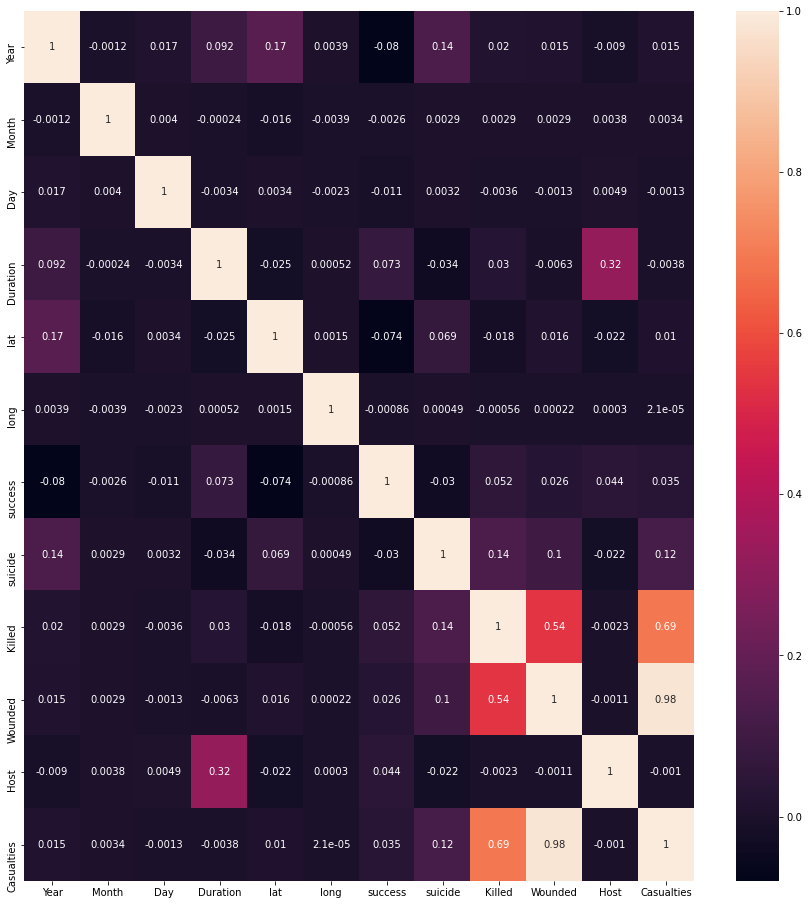

In [35]:
fig,axes = plt.subplots(1,1,figsize=(15,16))
sns.heatmap(data.corr(), annot =True)
plt.show()

Countries affected by terrorist attacks

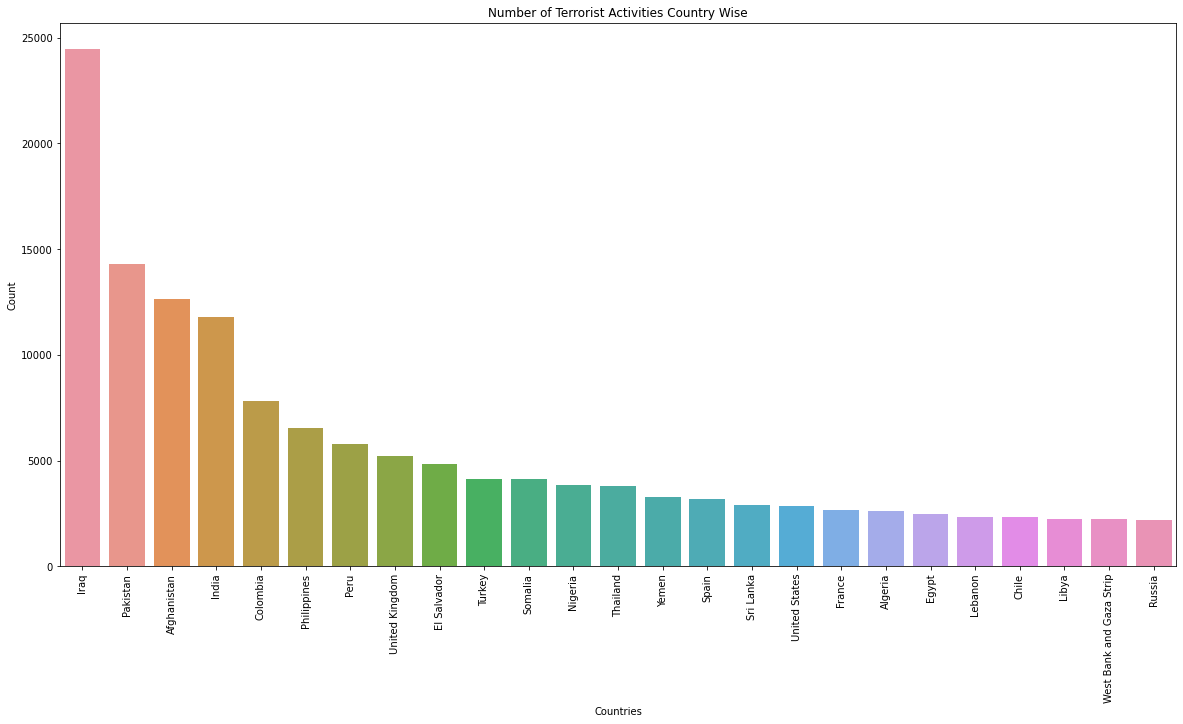

In [36]:
plt.figure(figsize =(20,10))
sns.barplot(x=data['Country'].value_counts()[:25].index,y =data['Country'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise")
plt.show()

Attack by region wise

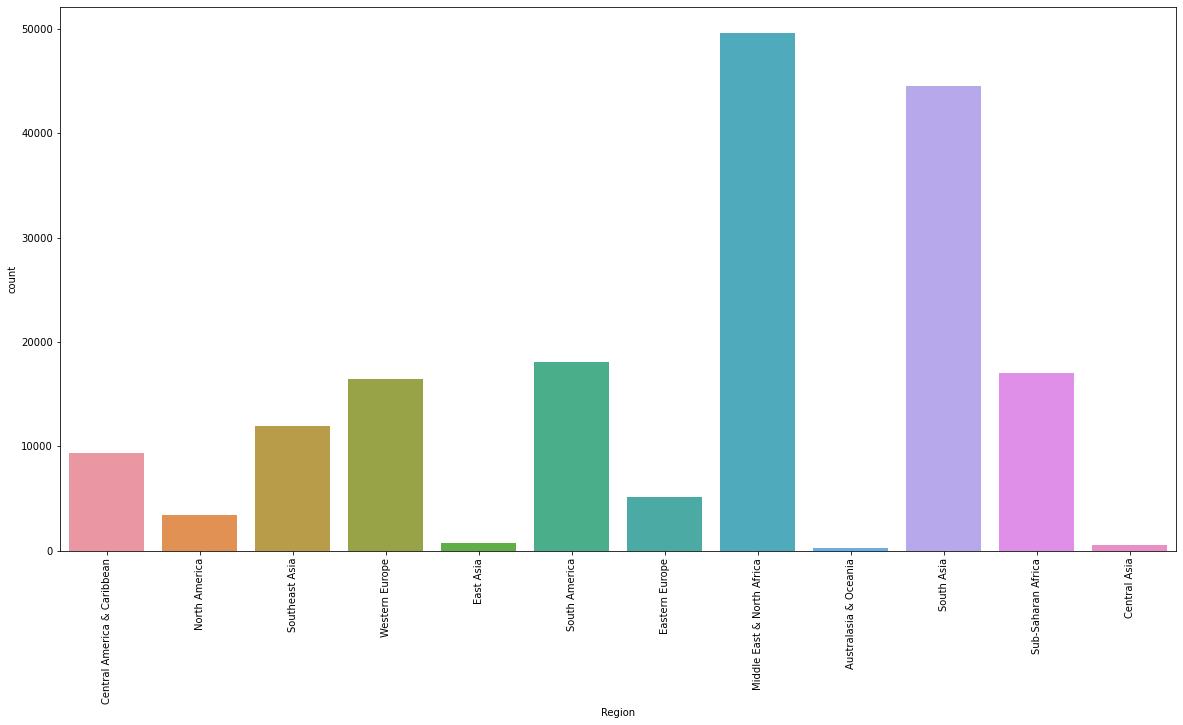

In [38]:
data['Region'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot(x="Region", data=data)
plt.xticks(rotation=90)
plt.show()

In [40]:
print("Country With Highest Terrorist Attacks:", data['Country'].value_counts().index[0])
print("Region With Highest Terrorist Attacks:", data['Region'].value_counts().index[0])


Country With Highest Terrorist Attacks: Iraq
Region With Highest Terrorist Attacks: Middle East & North Africa


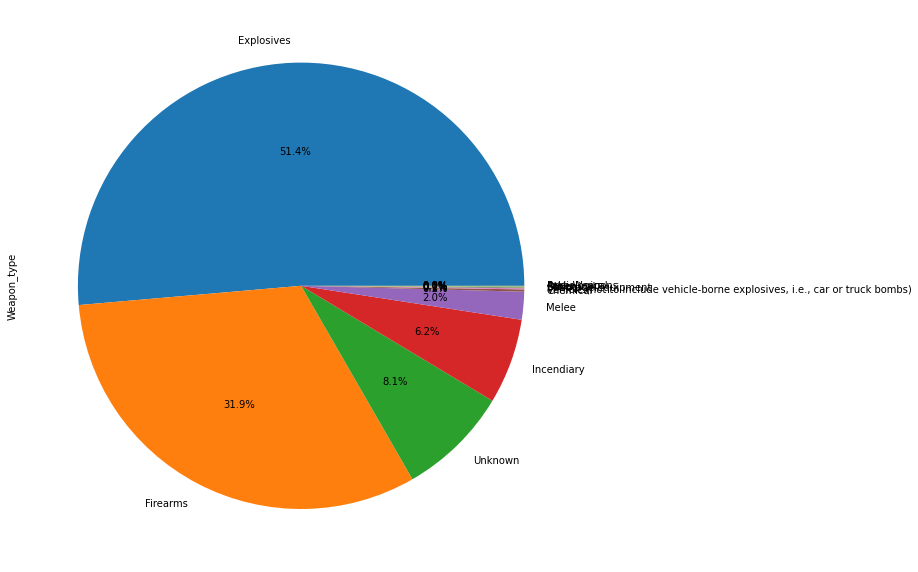

In [42]:
# Weapon types used with the help of pie chart
plt.figure(figsize=(10,15))
data['Weapon_type'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

# Number of Terrorist Attack each year

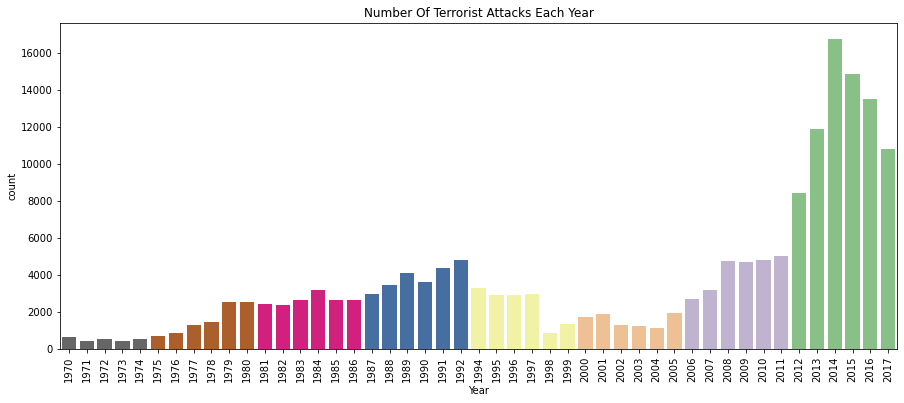

In [45]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='Accent_r')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

Number of Casualties Each Year

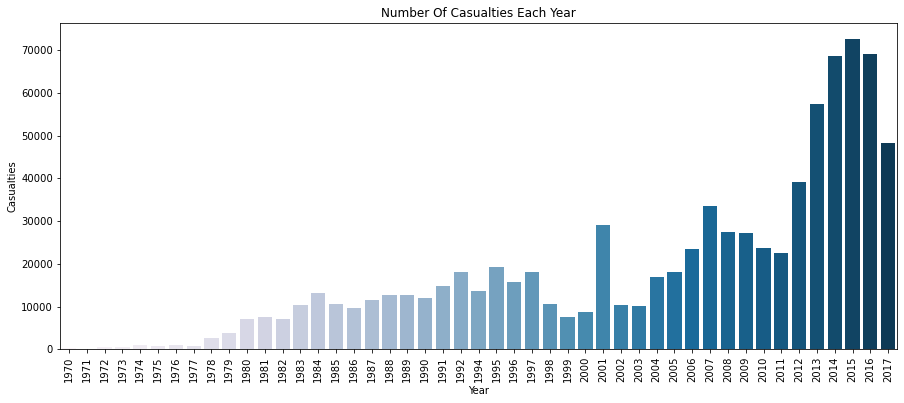

In [46]:
plt.subplots(figsize=(15,6))
year_cas = data.groupby('Year').Casualties.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualties']
sns.barplot(x=year_cas.Year, y=year_cas.Casualties, palette='PuBu')
plt.xticks(rotation=90)
plt.title('Number Of Casualties Each Year')
plt.show()

# Terrorism Affected Cities

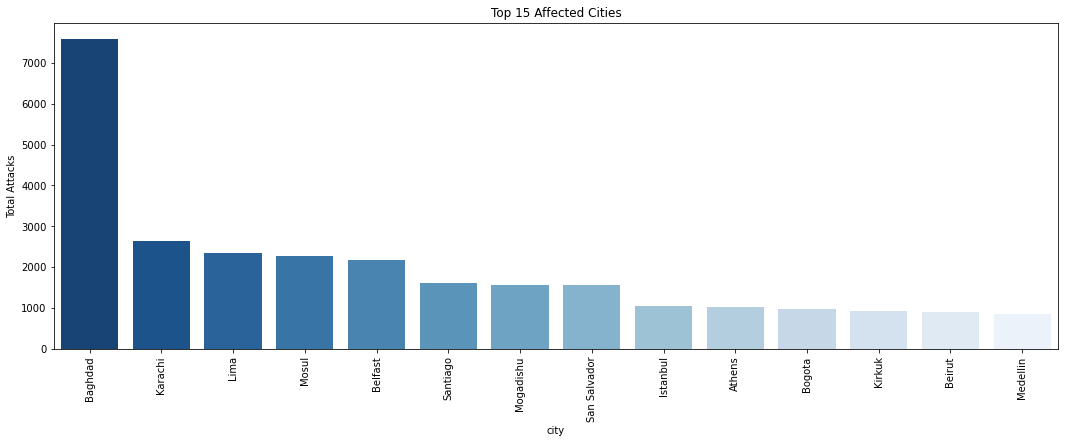

In [48]:
plt.subplots(figsize=(18,6))
city_attacks = data.city.value_counts()[:15].drop('Unknown').reset_index()
city_attacks.columns = ['city', 'Total Attacks']
sns.barplot(x=city_attacks.city, y=city_attacks['Total Attacks'], palette= 'Blues_r')
plt.xticks(rotation=90)
plt.title('Top 15 Affected Cities')
plt.show()

Baghdad, Karachi, Lima, Mosul, and Belfast are the top five most affected cities.

# Number of Total Attacks and Casualties By Region

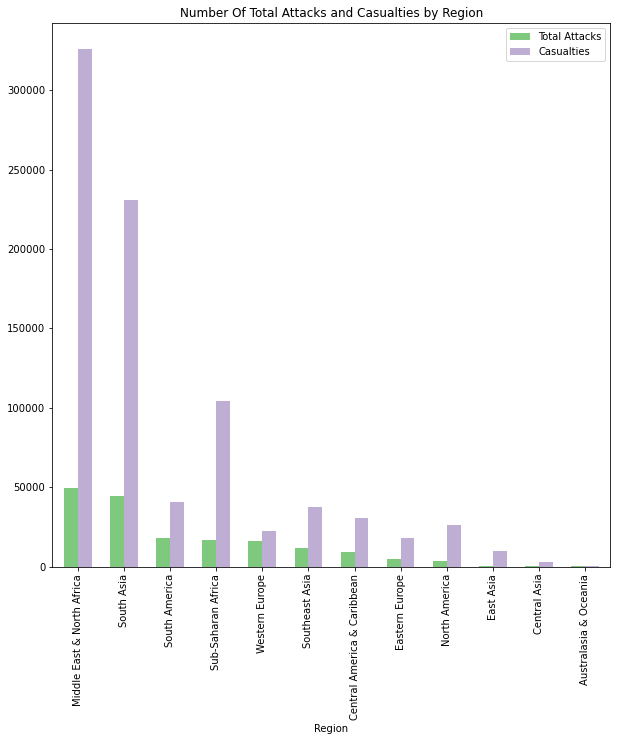

In [51]:
region_attacks = data.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
region_cas = data.groupby('Region').Casualties.sum().to_frame().reset_index()
region_cas.columns = ['Region', 'Casualties']
region_tot = pd.merge(region_attacks, region_cas, how='left', on='Region').sort_values('Total Attacks', ascending=False)
sns.set_palette('Accent')
region_tot.plot.bar(x='Region', width=0.6)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualties by Region')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

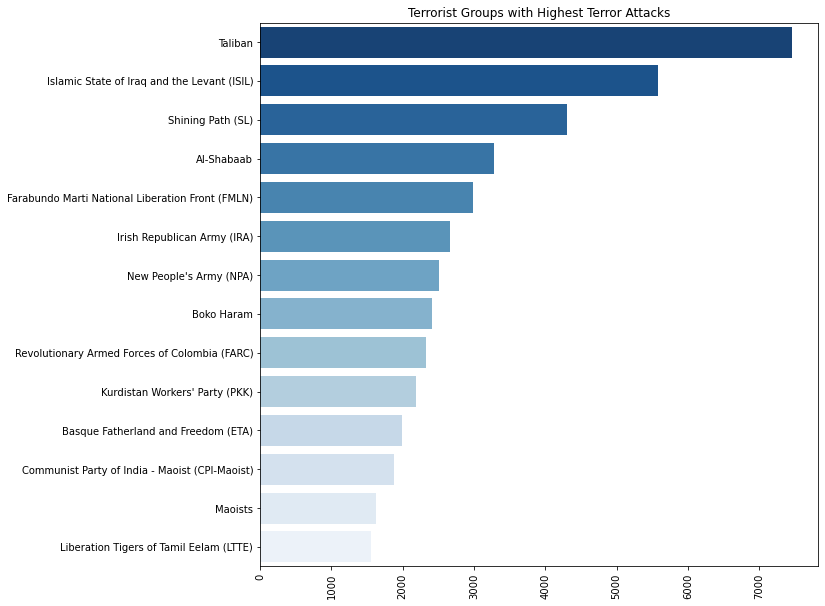

In [56]:
sns.barplot(data['Group'].value_counts()[1:15].values,data['Group'].value_counts()[1:15].index,palette=('Blues_r'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

As we can see Top 3 most dangerous organisation are taliban, ISIL and shining path

Countries with the highest number of Terrorist Attacks: Iraq

Region which is most attacked:Middle East & North Africa

There was a growth in terrorist attack from 1977 to 1981

Bombing/Explosions is the most common type of attack

Most targeted are private citizens are the preferred target of terrorists, with military property ranking in second.

Most type of weapon used is explosives.

Bellfast and Salvador are the most attacked cities

Most number of terriost attack were done by an unknown group

Highest number of frequencies of attacks in which year : 2014